In [25]:
import pandas as pd
import string
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import ImageColorGenerator
from PIL import Image
from Utils import preprocessing, load_data

## Utils

In [28]:
def pink_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(350, 100%%, %50d%%)" % random.randint(60, 90)

def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(207, 50%%, %50d%%)" % random.randint(30, 70)

In [5]:
mask = np.array(Image.open(".\Images\Circle.png"))
mask[mask == 0] = 255
font_path = "FONT PATH" 
#Font used "kg-red-hands" available at: https://www.dafont.com/es/kg-red-hands.font


In [19]:
stopwords = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", 
    "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst",
    "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", 
    "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", 
    "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", 
    "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough",
    "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", 
    "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", 
    "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "hence", "here", "hereafter", "hereby",
    "herein", "hereupon", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is",
    "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may",  "meanwhile", "might", "mill",
    "more", "moreover", "most", "mostly", "move", "much", "must", "name", "namely", "neither", "never", "nevertheless", 
    "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "now", "nowhere", "of", "off", "often", "on", "once", 
    "one", "only", "onto", "or", "other", "others", "otherwise",  "out", "over", "part", "per", "perhaps", "please", 
    "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "should", "show",
    "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "sometime", "sometimes", "somewhere",
    "still", "such", "system", "take", "ten", "than", "that", "the",  "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "thick", "thin", "third", "this", "those", "though", "three", "through",
    "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", 
    "under", "until", "up", "upon", "very", "via", "was", "well", "were", "what", "whatever", "when", "whence", "whenever",
    "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "the",
    "ve", "re", "ll", "10", "11","18", "oh","s", "t","m", "did", "got"]

In [7]:
threshold = 0.5

## miscassified memes by multimodal models

In [8]:
mtt_pred = pd.read_csv('./Multimodal/predictions/text_tags_pred_10Fold.csv', sep='\t')
mtt_pred['pred'] = mtt_pred['pred'].apply(lambda x: 0 if x <= threshold else 1)
mtt_pred.head()

,id,real,pred
0,5827.jpg,0,1
1,2454.jpg,0,0
2,6492.jpg,1,1
3,2054.jpg,1,1
4,5388.jpg,0,0


In [9]:
mtt_pred = mtt_pred.drop(mtt_pred[mtt_pred['real']==mtt_pred['pred']].index)
mtt_pred.head()


,id,real,pred
0,5827.jpg,0,1
5,6250.jpg,0,1
11,8963.jpg,0,1
19,4581.jpg,1,0
22,11148.jpg,0,1


In [10]:
mtc_pred = pd.read_csv('./Multimodal/predictions/text_captions_pred_10Fold.csv', sep='\t')
mtc_pred['pred'] = mtc_pred['pred'].apply(lambda x: 0 if x <= threshold else 1)
mtc_pred = mtc_pred.drop(mtc_pred[mtc_pred['real']==mtc_pred['pred']].index)
mtc_pred.head()

,id,real,pred
0,5827.jpg,0,1
17,9330.jpg,1,0
21,8572.jpg,1,0
22,11148.jpg,0,1
24,2677.jpg,0,1


In [11]:
vbert_pred = pd.read_csv('./VisualBert/Predictions/predictions_10Fold.csv', sep='\t')
vbert_pred['id'] = vbert_pred['id'].apply(lambda x: str(int(x))+'.jpg')
vbert_pred['pred'] = vbert_pred['pred'].apply(lambda x: 0 if x <= threshold else 1)
vbert_pred = vbert_pred.drop(vbert_pred[vbert_pred['real']==vbert_pred['pred']].index)
vbert_pred.head()

,id,real,pred
1,2454.jpg,0,1
11,8963.jpg,0,1
16,11627.jpg,0,1
22,11148.jpg,0,1
24,2677.jpg,0,1


In [13]:
result = pd.merge(mtc_pred, mtt_pred, how="inner", on=["id", "id"])
result = pd.merge(result, vbert_pred, how="inner", on=["id", "id"])
result.head()

,id,real_x,pred_x,real_y,pred_y,real,pred
0,11148.jpg,0,1,0,1,0,1
1,2677.jpg,0,1,0,1,0,1
2,522.jpg,1,0,1,0,1,0
3,2766.jpg,0,1,0,1,0,1
4,9238.jpg,0,1,0,1,0,1


In [14]:
result.shape

(853, 7)

## Correctly classified by multimodal models

In [42]:
mtt_pred = pd.read_csv('./Multimodal/predictions/text_tags_pred_10Fold.csv', sep='\t')
mtt_pred['pred'] = mtt_pred['pred'].apply(lambda x: 0 if x <= threshold else 1)
mtt_pred = mtt_pred.drop(mtt_pred[mtt_pred['real']!=mtt_pred['pred']].index)
mtt_pred.head()

,id,real,pred
1,2454.jpg,0,0
2,6492.jpg,1,1
3,2054.jpg,1,1
4,5388.jpg,0,0
6,7952.jpg,1,1


In [43]:
mtc_pred = pd.read_csv('./Multimodal/predictions/text_captions_pred_10Fold.csv', sep='\t')
mtc_pred['pred'] = mtc_pred['pred'].apply(lambda x: 0 if x <= threshold else 1)
mtc_pred = mtc_pred.drop(mtc_pred[mtc_pred['real']!=mtc_pred['pred']].index)
mtc_pred.head()

,id,real,pred
1,2454.jpg,0,0
2,6492.jpg,1,1
3,2054.jpg,1,1
4,5388.jpg,0,0
5,6250.jpg,0,0


In [44]:
vbert_pred = pd.read_csv('./VisualBert/Predictions/predictions_10Fold.csv', sep='\t')
vbert_pred['id'] = vbert_pred['id'].apply(lambda x: str(int(x))+'.jpg')
vbert_pred['pred'] = vbert_pred['pred'].apply(lambda x: 0 if x <= threshold else 1)
vbert_pred = vbert_pred.drop(vbert_pred[vbert_pred['real']!=vbert_pred['pred']].index)
vbert_pred.head()

,id,real,pred
0,5827.jpg,0,0
2,6492.jpg,1,1
3,2054.jpg,1,1
4,5388.jpg,0,0
5,6250.jpg,0,0


In [45]:
correct = pd.merge(mtc_pred, mtt_pred, how="inner", on=["id", "id"])
correct = pd.merge(correct, vbert_pred, how="inner", on=["id", "id"])
correct.head()

,id,real_x,pred_x,real_y,pred_y,real,pred
0,6492.jpg,1,1,1,1,1,1
1,2054.jpg,1,1,1,1,1,1
2,5388.jpg,0,0,0,0,0,0
3,7952.jpg,1,1,1,1,1,1
4,6467.jpg,0,0,0,0,0,0


## Wordcloud Text

In [15]:
# add Text transcription
data = load_data.load_training_data()
data.rename(columns = {'file_name':'id'}, inplace = True)
result = pd.merge(result, data, how="inner", on=["id", "id"])
result.head()

,id,real_x,pred_x,real_y,pred_y,real,pred,misogynous,Text Transcription
0,11148.jpg,0,1,0,1,0,1,0,Damn Bruh!... Since when do you wear thongs?! ...
1,2677.jpg,0,1,0,1,0,1,0,YOU KNOW MIKE TYSON BEATS HIS WIFE. BUT THERE'...
2,522.jpg,1,0,1,0,1,0,1,& s Speedy Gonzales was banned by Cartoon Netw...
3,2766.jpg,0,1,0,1,0,1,0,mimme T Milfmeter
4,9238.jpg,0,1,0,1,0,1,0,"When you spend $80,000 on a college education ..."


In [17]:
lemmi = pd.read_csv("./Data/Lemmatized/lemmatized_spacy.csv", sep='\t', usecols=['file_name', 'lemmatized'])
lemmi['lemmatized']= lemmi['lemmatized'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
lemmi.rename(columns = {'file_name':'id'}, inplace = True)
lemmi.head()

,id,lemmatized
0,5827.jpg,get on pornhub woman on porn ad be you ser...
1,2454.jpg,when your high school girlfriend finally turn ...
2,6492.jpg,I every time I refuse to objectify woman I can...
3,2054.jpg,verizon q search news r kotakuinaction2 there...
4,5388.jpg,I watch a horror movie no dude be not I sudden...


In [46]:
result = pd.merge(result, lemmi, how="inner", on=["id", "id"])
correct = pd.merge(correct, lemmi, how="inner", on=["id", "id"])

In [22]:
number =50

### Text _ Misclassified 

In [23]:
miso = result.loc[result['real']==1,:]
non_miso = result.loc[result['real']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

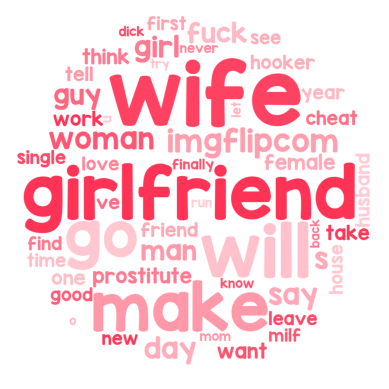

In [30]:
text = " ".join(i for i in miso.lemmatized)
stopwords = set(STOPWORDS)
wrong_miso = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(wrong_miso, interpolation='bilinear')
plt.imshow(wrong_miso.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

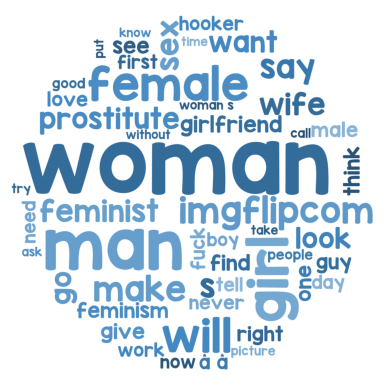

In [34]:
text = " ".join(i for i in non_miso.lemmatized)
wrong_non = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(wrong_non, interpolation='bilinear')
plt.imshow(wrong_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")

### Text _ Correct

In [49]:
miso = correct.loc[correct['real']==1,:]
non_miso = correct.loc[correct['real']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

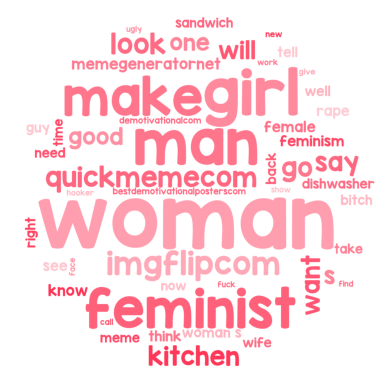

In [53]:
text = " ".join(i for i in miso.lemmatized)
stopwords = set(stopwords)
correct_miso = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(correct_miso, interpolation='bilinear')
plt.imshow(correct_miso.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

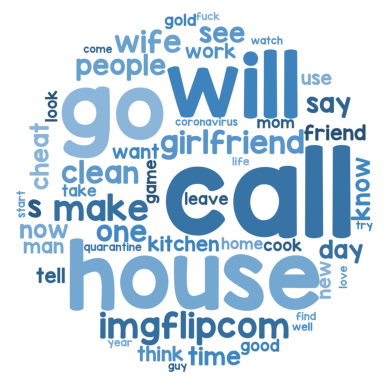

In [57]:
text = " ".join(i for i in non_miso.lemmatized)
correct_non = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(correct_non, interpolation='bilinear')
plt.imshow(correct_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")

### Text _ Whole dataset

In [59]:
miso = meme.loc[meme['misogynous']==1,:]
non_miso = meme.loc[meme['misogynous']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

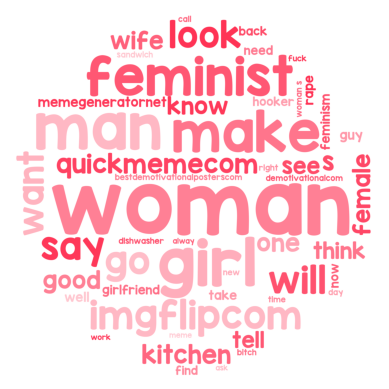

In [61]:
text = " ".join(i for i in miso.lemmatized)
stopwords = set(stopwords)
dat_miso = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(dat_miso, interpolation='bilinear')
plt.imshow(dat_miso.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

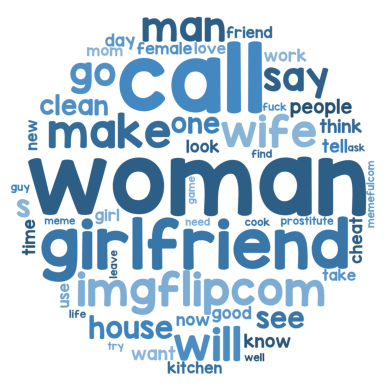

In [63]:
text = " ".join(i for i in non_miso.lemmatized)
dat_non = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(dat_non, interpolation='bilinear')
plt.imshow(dat_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")

## Wordcloud Tags 

In [68]:
tags_df = load_data.load_clarifai_training_data()
tags_df

,file_name,misogynous,Text Transcription,clarifai
0,5827.jpg,0,"*Gets on Pornhub* Woman on Porn Ad: ""Are you s...",cartoon child man
1,2454.jpg,0,When your high school girlfriend finally turns...,cartoon man woman
2,6492.jpg,1,Me every time I refuse to objectify women I ca...,woman
3,2054.jpg,1,Verizon Q Search News r/kotakuinaction2 There ...,cartoon man woman
4,5388.jpg,0,me watching a horror movie NO DUDE WASN'T ME s...,animal cartoon
...,...,...,...,...
9995,6179.jpg,1,LMAObama.com GET UP OFFA THAT THING,woman
9996,11354.jpg,1,QUO 74 BUCKEYES THE OHIO STATE Where the hotti...,woman
9997,3073.jpg,1,FEEL LIKE Doin' Some Plowin? memecenter.com Me...,woman nudity
9998,13096.jpg,1,BLOND WONDERING WHY SHE ONLY HAS THREE SISTERS...,woman


In [69]:
tags_df.drop(columns=['misogynous','Text Transcription'])

,file_name,clarifai
0,5827.jpg,cartoon child man
1,2454.jpg,cartoon man woman
2,6492.jpg,woman
3,2054.jpg,cartoon man woman
4,5388.jpg,animal cartoon
...,...,...
9995,6179.jpg,woman
9996,11354.jpg,woman
9997,3073.jpg,woman nudity
9998,13096.jpg,woman


In [ ]:
# add Text transcription
tags_df.rename(columns = {'file_name':'id'}, inplace = True)

result = pd.merge(result, tags_df, how="inner", on=["id", "id"])
result.head()

### Tags _ Misclassified

In [71]:
miso = result.loc[result['real']==1,:]
non_miso = result.loc[result['real']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

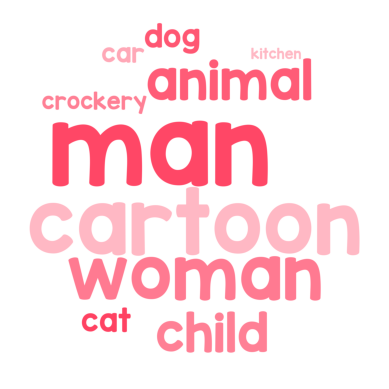

In [72]:
text = " ".join(i for i in miso.clarifai)
wordcloud = WordCloud(background_color="white",
    mask=mask,
    font_path=font_path, 
    collocations=False,
    max_words=20,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

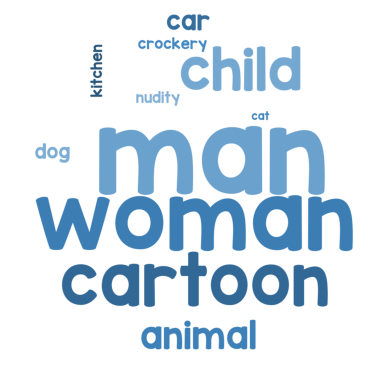

In [73]:
text = " ".join(i for i in non_miso.clarifai)
dat_non = WordCloud( background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=14,
    collocations=False,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(dat_non, interpolation='bilinear')
plt.imshow(dat_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")

### Tags _ Correct

In [74]:
meme = load_data.load_training_data()
meme.rename(columns = {'file_name':'id'}, inplace = True)
correct = meme[~meme.id.isin(result.id)]

In [75]:
correct = pd.merge(correct, tags_df, how="inner", on=["id", "id"])
correct.shape

(9147, 6)

In [76]:
miso = correct.loc[correct['misogynous_x']==1,:]
non_miso = correct.loc[correct['misogynous_x']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

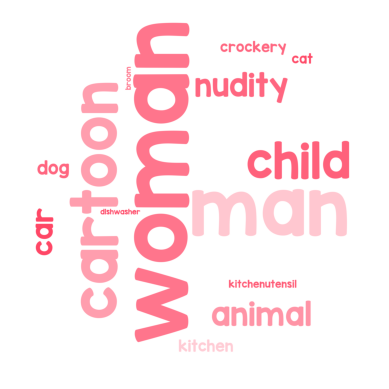

In [77]:
text = " ".join(i for i in miso.clarifai)
correct_miso = WordCloud(collocations=False, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=20,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(correct_miso, interpolation='bilinear')
plt.imshow(correct_miso.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

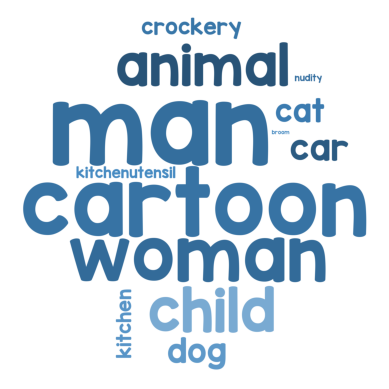

In [78]:
text = " ".join(i for i in non_miso.clarifai)
correct_non = WordCloud(    collocations=False, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=20,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(correct_non, interpolation='bilinear')
plt.imshow(correct_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")

### Tags _ whole dataset

In [79]:
meme = pd.merge(meme, tags_df, how="inner", on=["id", "id"])

In [80]:
miso = meme.loc[meme['misogynous_x']==1,:]
non_miso = meme.loc[meme['misogynous_x']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

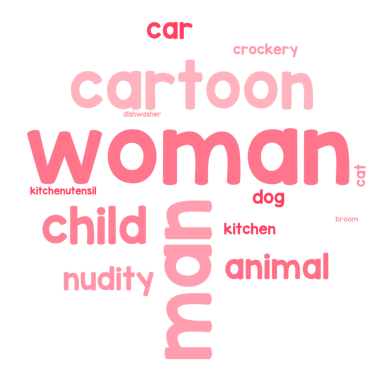

In [83]:
text = " ".join(i for i in miso.clarifai)
dat_miso = WordCloud(background_color="white",
    collocations=False,
    mask=mask,
    font_path=font_path, 
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(dat_miso, interpolation='bilinear')
plt.imshow(dat_miso.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

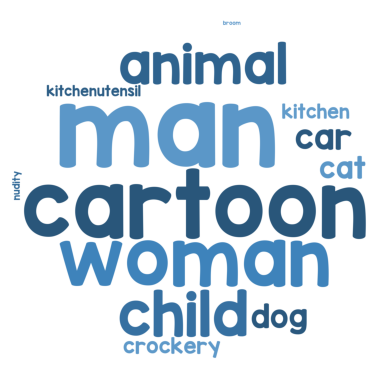

In [84]:
text = " ".join(i for i in non_miso.clarifai)
dat_non = WordCloud(background_color="white",
    collocations=False,
    mask=mask,
    font_path=font_path, 
    max_words=20,
    width=mask.shape[1],
    height=mask.shape[0]).generate(text)
plt.imshow(dat_non, interpolation='bilinear')
plt.imshow(dat_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")

# Wordcloud Captions

In [87]:
#import captions lemmatized
capt_df = pd.read_csv('.\Data\Lemmatized\lemmatized_captions.csv', sep='\t')
capt_df['path'] = capt_df['path'].apply(lambda x: str(int(x))+'.jpg')
capt_df.head()

,path,caption,objects,lemmatized
0,11417.jpg,a yellow rubber duck,"['text', 'businesscard', 'screenshot']",a yellow rubber duck
1,10638.jpg,a woman smiling for the camera,"['text', 'person', 'woman', 'posing', 'shop']",a woman smile for the camera
2,11663.jpg,a person holding a baby,"['text', 'person', 'outdoor']",a person hold a baby
3,6380.jpg,a monkey sitting on a rock,"['text', 'dog', 'ground', 'outdoor', 'animal',...",a monkey sit on a rock
4,10437.jpg,diagram,['diagram'],diagram


In [88]:
capt_df.rename(columns = {'path':'id'}, inplace = True)
capt_df.rename(columns = {'lemmatized':'capt'}, inplace = True)
result = pd.merge(result, capt_df, how="inner", on=["id", "id"])
result.shape

(853, 17)

In [89]:
correct = pd.merge(correct, capt_df, how="inner", on=["id", "id"])

In [90]:
meme = pd.merge(meme, capt_df, how="inner", on=["id", "id"])

### Captions _ misclassified

In [91]:
miso = result.loc[result['real']==1,:]
non_miso = result.loc[result['real']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

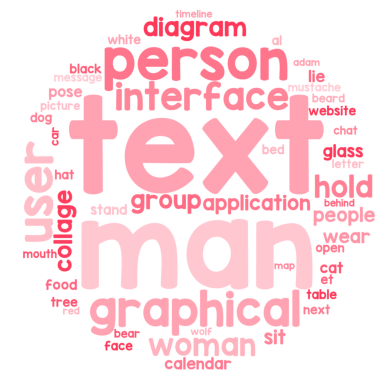

In [92]:
capt = " ".join(i for i in miso.capt)
stopwords = set(STOPWORDS)
wrong_miso = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    collocations=False,
    width=mask.shape[1],
    height=mask.shape[0]).generate(capt)
plt.imshow(wrong_miso, interpolation='bilinear')
plt.imshow(wrong_miso.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

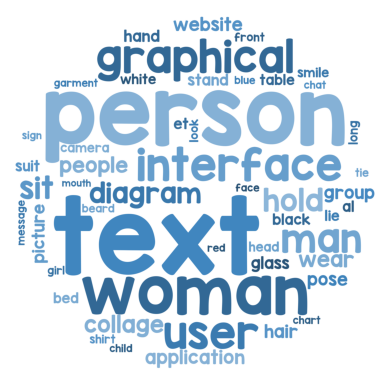

In [93]:
capt = " ".join(i for i in non_miso.capt)
stopwords = set(STOPWORDS)
wrong_non = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    collocations=False,
    width=mask.shape[1],
    height=mask.shape[0]).generate(capt)
plt.imshow(wrong_non, interpolation='bilinear')
plt.imshow(wrong_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")

### Captions _ Correct

In [94]:
miso = correct.loc[correct['misogynous_x']==1,:]
non_miso = correct.loc[correct['misogynous_x']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

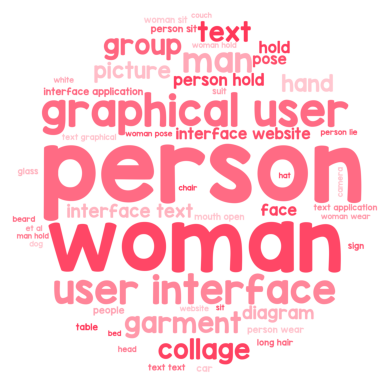

In [95]:
capt = " ".join(i for i in miso.capt)
stopwords = set(stopwords)
correct_miso = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(capt)
plt.imshow(correct_miso, interpolation='bilinear')
plt.imshow(correct_miso.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

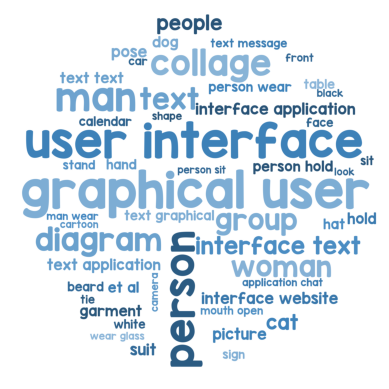

In [96]:
capt = " ".join(i for i in non_miso.capt)
correct_non = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(capt)
plt.imshow(correct_non, interpolation='bilinear')
plt.imshow(correct_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")

### Captions _ Whole dataset

In [97]:
miso = meme.loc[meme['misogynous']==1,:]
non_miso = meme.loc[meme['misogynous']==0,:]

(-0.5, 2047.5, 2047.5, -0.5)

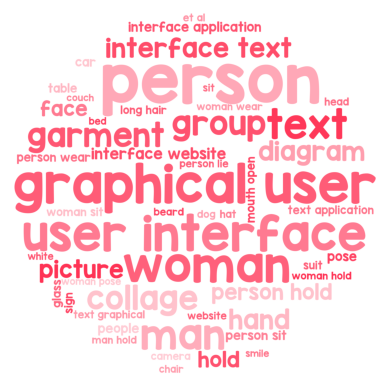

In [98]:
capt = " ".join(i for i in miso.capt)
stopwords = set(stopwords)
dat_miso = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(capt)
plt.imshow(dat_miso, interpolation='bilinear')
plt.imshow(dat_miso.recolor(color_func=pink_color_func, random_state=3))
plt.axis("off")

(-0.5, 2047.5, 2047.5, -0.5)

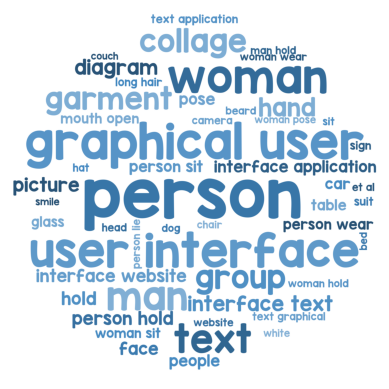

In [99]:
capt = " ".join(i for i in miso.capt)
dat_non = WordCloud(stopwords=stopwords, background_color="white",
    mask=mask,
    font_path=font_path, 
    max_words=number,
    width=mask.shape[1],
    height=mask.shape[0]).generate(capt)
plt.imshow(dat_non, interpolation='bilinear')
plt.imshow(dat_non.recolor(color_func=blue_color_func, random_state=3))
plt.axis("off")